> ### Note on Labs and Assigments:
>
> 🔧 Look for the **wrench emoji** 🔧 — it highlights where you're expected to take action!
>
> These sections are graded and are not optional.
>

# IS 4487 Lab 5: EDA

## Outline

- Univariate analysis (distributions, histograms, counts)
- Bivariate analysis (correlations, scatterplots, group comparisons)
- Reflections and insights

This lab builds on the cleaned dataset from **Lab 4**. Make sure you've removed outliers and handled missing values before beginning.

<a href="https://colab.research.google.com/github/Stan-Pugsley/is_4487_base/blob/main/Labs/lab_05_eda.ipynb" target="_parent">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

If you have any questions about Colab, you can read more here:  
https://research.google.com/colaboratory/faq.html


## Dataset Overview

**Dataset:** `rent.csv`  
Source: [TidyTuesday – 2022-07-05](https://github.com/rfordatascience/tidytuesday/blob/main/data/2022/2022-07-05/rent.csv)

| Variable       | Type       | Description |
|----------------|------------|-------------|
| `post_id`      | Categorical| Unique listing ID |
| `date`         | Numeric    | Listing date (numeric format) |
| `year`         | Integer    | Year of listing |
| `nhood`        | Categorical| Neighborhood |
| `city`         | Categorical| City |
| `county`       | Categorical| County |
| `price`        | Numeric    | Listing price (USD) |
| `beds`         | Numeric    | Number of bedrooms |
| `baths`        | Numeric    | Number of bathrooms |
| `sqft`         | Numeric    | Square footage |
| `room_in_apt`  | Binary     | Indicates whether the rental listing is for an entire apartment (0) or a single room within an apartment (1)|
| `address`      | Categorical| Street address |
| `lat`          | Numeric    | Latitude |
| `lon`          | Numeric    | Longitude |
| `title`        | Text       | Listing title |
| `descr`        | Text       | Listing description |
| `details`      | Text       | Additional details |


## Part 1: Importing the Data

### Instructions:
- Import the `pandas` library for dataframes.  Then `Matplotlib` and `Seaborn` for data visualization.
- Import data from the rent.csv into a dataframe from the tidytuesday link.
- Use `.info()` and `.head()` to inspect the structure and preview the data.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = 'https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2022/2022-07-05/rent.csv'
df = pd.read_csv(url)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200796 entries, 0 to 200795
Data columns (total 17 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   post_id      200796 non-null  object 
 1   date         200796 non-null  int64  
 2   year         200796 non-null  int64  
 3   nhood        200796 non-null  object 
 4   city         200796 non-null  object 
 5   county       199402 non-null  object 
 6   price        200796 non-null  int64  
 7   beds         194188 non-null  float64
 8   baths        42675 non-null   float64
 9   sqft         64679 non-null   float64
 10  room_in_apt  200796 non-null  int64  
 11  address      3908 non-null    object 
 12  lat          7651 non-null    float64
 13  lon          4312 non-null    float64
 14  title        198279 non-null  object 
 15  descr        3254 non-null    object 
 16  details      8016 non-null    object 
dtypes: float64(5), int64(4), object(8)
memory usage: 26.0+ MB


In [4]:
df.head()

,post_id,date,year,nhood,city,county,price,beds,baths,sqft,room_in_apt,address,lat,lon,title,descr,details
0,pre2013_134138,20050111,2005,alameda,alameda,alameda,1250,2.0,2.0,NaN,0,NaN,NaN,NaN,$1250 / 2br - 2BR/2BA 1145 ALAMEDA DE LAS PU...,NaN,NaN
1,pre2013_135669,20050126,2005,alameda,alameda,alameda,1295,2.0,NaN,NaN,0,NaN,NaN,NaN,$1295 / 2br - Walk the Beach! 1 FREE MONTH + $...,NaN,NaN
2,pre2013_127127,20041017,2004,alameda,alameda,alameda,1100,2.0,NaN,NaN,0,NaN,NaN,NaN,$1100 / 2br - cottage,NaN,NaN
3,pre2013_68671,20120601,2012,alameda,alameda,alameda,1425,1.0,NaN,735.0,0,NaN,NaN,NaN,$1425 / 1br - 735ft² - BEST LOCATION SOUTHSHOR...,NaN,NaN
4,pre2013_127580,20041021,2004,alameda,alameda,alameda,890,1.0,NaN,NaN,0,NaN,NaN,NaN,"$890 / 1br - Classy ""Painted Lady"" VICTORIAN -...",NaN,NaN


## Part 2: Inspecting, Cleaning & Removing Outliers

### Instructions:
- Identify missing values.
- Check data types are correct(e.g., dates, numeric columns).
- Check for outliers key numeric variables like `price`, `sqft`, `beds`, or `baths`.

### Think about:
- Are there missing values?
- Do the data types look appropriate?
- Do any numeric variables contain extreme or unusual values?


In [5]:
# Check for missing values
df.isnull().sum()

,0
post_id,0
date,0
year,0
nhood,0
city,0
county,1394
price,0
beds,6608
baths,158121
sqft,136117


In [6]:
# Basic summary statistics
df[['price', 'beds', 'baths', 'sqft']].describe()

,price,beds,baths,sqft
count,200796.000000,194188.000000,42675.000000,64679.000000
mean,2135.362746,1.889025,1.679086,1201.827688
std,1427.747903,1.079138,0.690509,5000.217864
min,220.000000,0.000000,1.000000,80.000000
25%,1295.000000,1.000000,1.000000,750.000000
50%,1800.000000,2.000000,2.000000,1000.000000
75%,2505.000000,3.000000,2.000000,1360.000000
max,40000.000000,12.000000,8.000000,900000.000000


In [7]:
# Check data types
df.dtypes

,0
post_id,object
date,int64
year,int64
nhood,object
city,object
county,object
price,int64
beds,float64
baths,float64
sqft,float64


In [8]:
# Remove price & sqft outliers (1st–99th percentile)
q_low = df['price'].quantile(0.01)
q_high = df['price'].quantile(0.99)
df = df[(df['price'] >= q_low) & (df['price'] <= q_high) & (df['sqft'] <= q_high)]

## Part 3: Basic Exploration

Use `groupby` and `value_counts` to summarize trends across neighborhoods and cities.


In [9]:
# Average price by neighborhood
df.groupby('nhood')['price'].mean().sort_values(ascending=False).head(10)

,price
nhood,
inverness,5310.000000
saratoga,4406.831169
montara,4300.000000
pacific heights,4249.898551
west portal / forest hills,4145.341772
NOPA,4112.990826
haight ashbury,4074.616279
lower haight,4015.936170
kentfield / ross,3985.591837


In [10]:
# Top cities by count
df['city'].value_counts().head(10)

,count
city,
san francisco,9965
san jose,6776
santa rosa,2570
santa cruz,2485
sunnyvale,2214
santa clara,2094
oakland,1758
union city,1673
mountain view,1642


## Part 4: Univariate Analysis

Explore individual variables to understand their distributions and frequency.

### Tasks:
- Plot histograms for numeric variables (`price`, `sqft`)
- Plot countplots for categorical variables (`beds`, `nhood`)


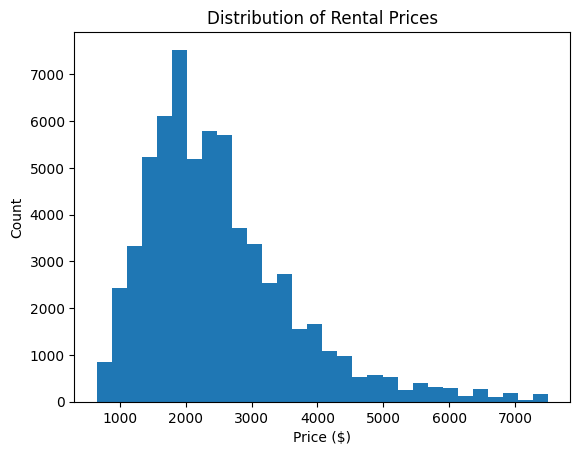

In [11]:
# Histogram: Price
plt.hist(df['price'], bins=30)
plt.title("Distribution of Rental Prices")
plt.xlabel("Price ($)")
plt.ylabel("Count")
plt.show()

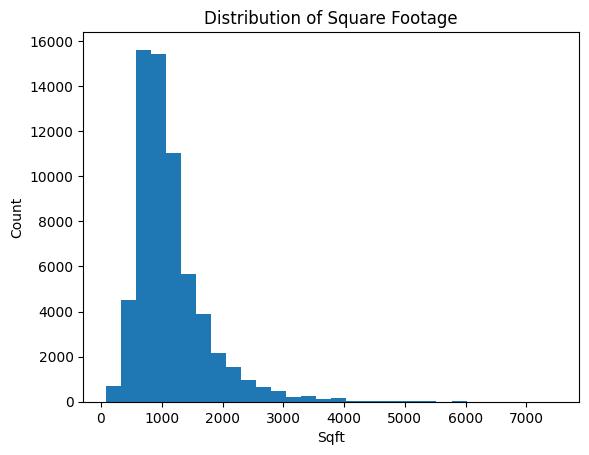

In [12]:
# Histogram: Square Footage
plt.hist(df['sqft'].dropna(), bins=30)
plt.title("Distribution of Square Footage")
plt.xlabel("Sqft")
plt.ylabel("Count")
plt.show()


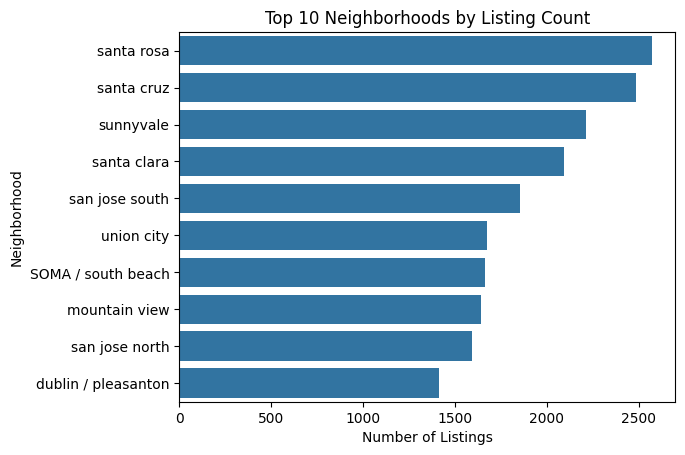

In [13]:
# Bar plot of top 10 neighborhoods by number of listings
top_nhoods = df['nhood'].value_counts().head(10)

sns.barplot(x=top_nhoods.values, y=top_nhoods.index)
plt.title("Top 10 Neighborhoods by Listing Count")
plt.xlabel("Number of Listings")
plt.ylabel("Neighborhood")
plt.show()

### 🔧 Try It Yourself – Part 4

1. Create two new visualizations using different variables than the ones already shown above.

>Suggestions:
- A **histogram** of the `baths` variable
- A **bar chart** showing the **average square footage by number of bathrooms**

> Be sure to label your axes and include a title for each chart.

2. After creating the visuals, write 1–2 sentences explaining what you notice in each.


In [ ]:
# Visual 1 🔧

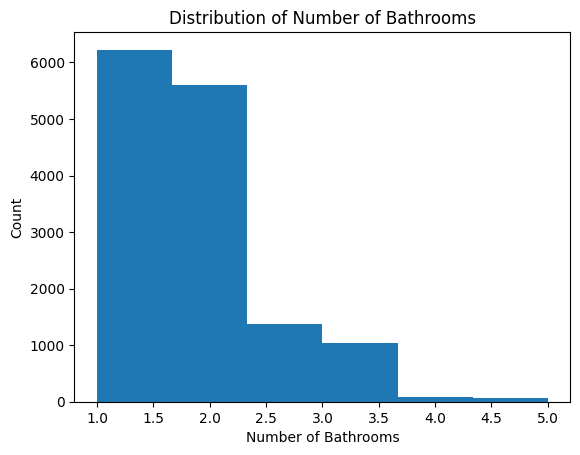

In [33]:
# A histogram of the baths variable 🔧
plt.hist(df['baths'].dropna(), bins=int(df['baths'].max()) + 1)
plt.title("Distribution of Number of Bathrooms")
plt.xlabel("Number of Bathrooms")
plt.ylabel("Count")
plt.show()

In this chart I notice that there are many more rentals with 1-2 bathrooms.The count decreases substantially at 2.5 bathrooms and keeps decreasing from there. There is a lot of missing data in the baths category so this chart can't be fully trusted.

🔧 Visual 1 comment:

In [ ]:
# Visual 2 🔧

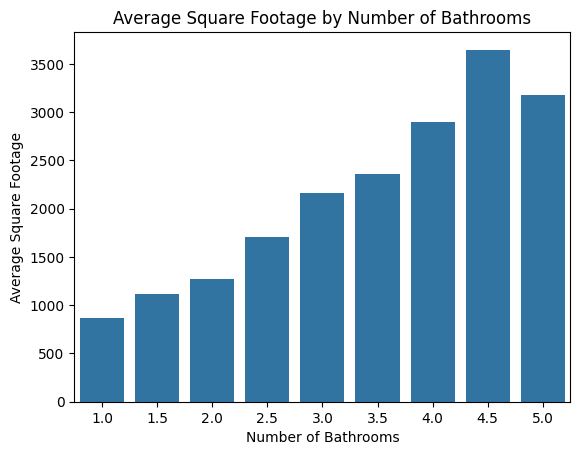

In [16]:
# Visual 2 🔧
avg_sqft_baths = df.groupby('baths')['sqft'].mean().sort_index()

sns.barplot(x=avg_sqft_baths.index, y=avg_sqft_baths.values)
plt.title("Average Square Footage by Number of Bathrooms")
plt.xlabel("Number of Bathrooms")
plt.ylabel("Average Square Footage")
plt.show()

In this chart I notice that the trend is mostly upward when it comes to the relationship between the increase in square footage and the increase in number of bathrooms. There is a slight decrease at 5 bathrooms but that could be due to potential outliers or the large amount of missing data in the baths category.

🔧 Visual 2 comment:

## Part 5: Bivariate Analysis

Explore relationships between two variables to understand how features like square footage or bedrooms influence price.


In [15]:
# Correlation matrix
corr_matrix = df[['price', 'beds', 'baths', 'sqft']].corr()
corr_matrix


,price,beds,baths,sqft
price,1.000000,0.416222,0.360637,0.516866
beds,0.416222,1.000000,0.671327,0.799919
baths,0.360637,0.671327,1.000000,0.714175
sqft,0.516866,0.799919,0.714175,1.000000


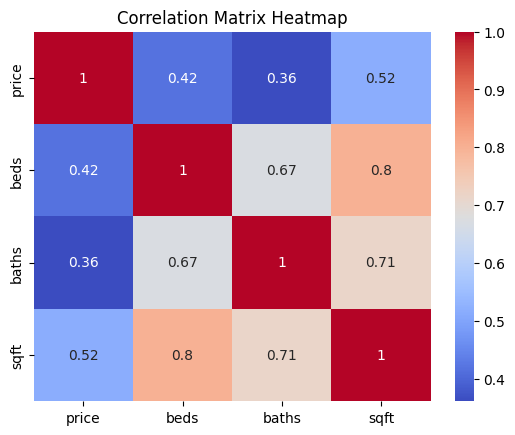

In [16]:
# Heatmap of correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix Heatmap")
plt.show()

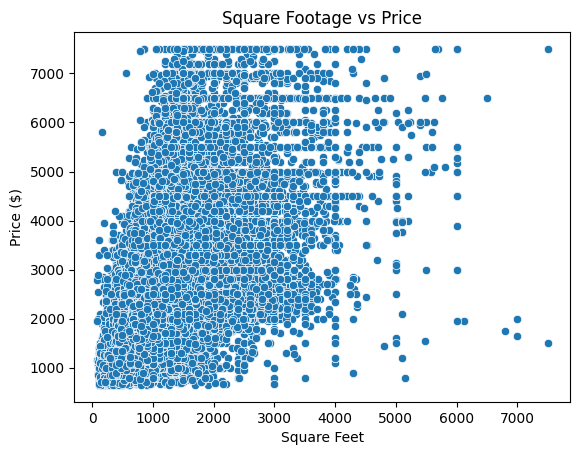

In [17]:
# Scatterplot: Square Footage vs Price
sns.scatterplot(x='sqft', y='price', data=df)
plt.title("Square Footage vs Price")
plt.xlabel("Square Feet")
plt.ylabel("Price ($)")
plt.show()

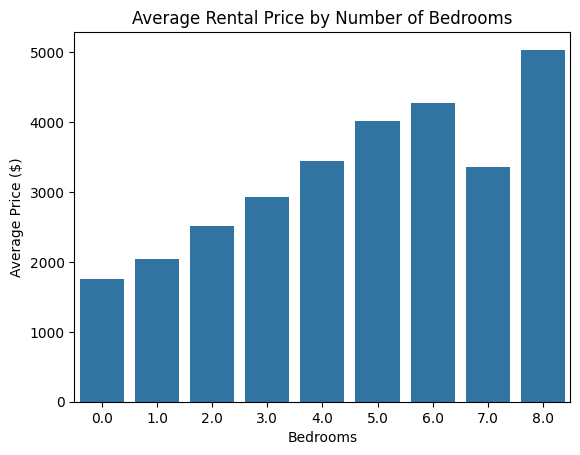

In [18]:
# Average price by number of bedrooms
avg_price_beds = df.groupby('beds')['price'].mean().sort_index()
sns.barplot(x=avg_price_beds.index, y=avg_price_beds.values)
plt.title("Average Rental Price by Number of Bedrooms")
plt.xlabel("Bedrooms")
plt.ylabel("Average Price ($)")
plt.show()

### 🔧 Try It Yourself – Part 5

1. Create a scatterplot of `baths` vs `price`.  
2. Group by `year` and plot the average price over time.
3. What trends or outliers do you see?

In [ ]:
#1 🔧

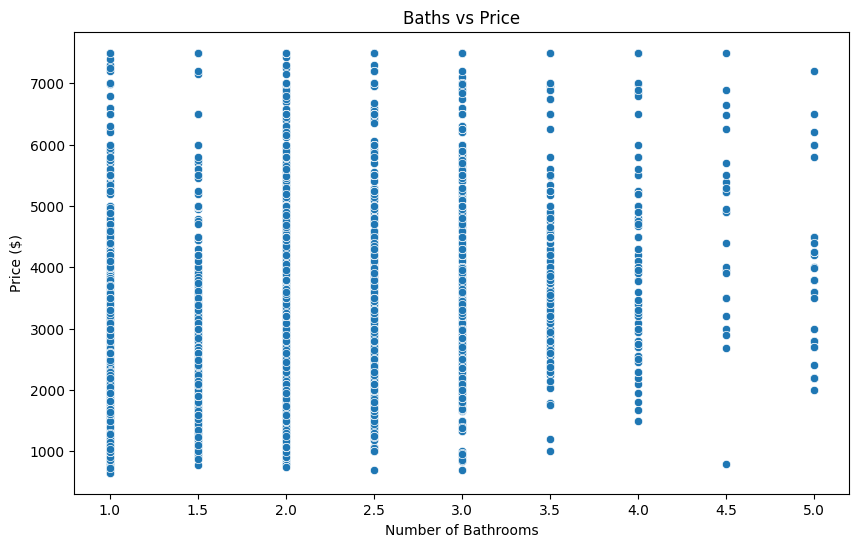

In [27]:
#1 🔧 Scatterplot: baths vs price
plt.figure(figsize=(10, 6)) # Increase figure size so I can see potential outliers
sns.scatterplot(x='baths', y='price', data=df)
plt.title("Baths vs Price")
plt.xlabel("Number of Bathrooms")
plt.ylabel("Price ($)")
plt.show()

In [ ]:
#2 🔧

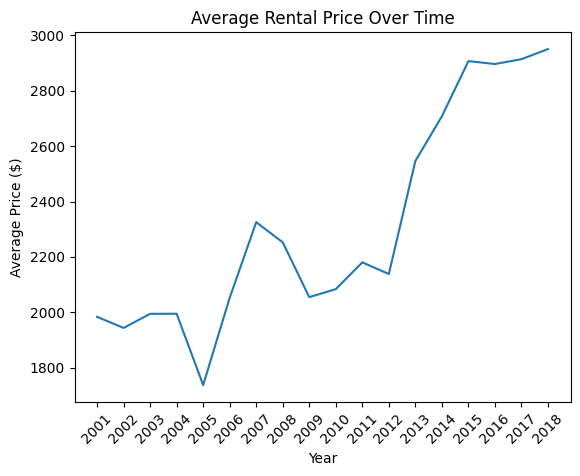

In [24]:
#2 🔧 Group by year and plot average price over time
avg_price_year = df.groupby('year')['price'].mean()

plt.plot(avg_price_year.index, avg_price_year.values)
plt.title("Average Rental Price Over Time")
plt.xlabel("Year")
plt.ylabel("Average Price ($)")
plt.xticks(avg_price_year.index.astype(int), rotation=45) # make the yr and integer & make it readable
plt.show()

🔧 Add comment here:

From the scaterplot, it seems like there are quite a bit of outliers. Additionally the average price per year seems to generally go up. There are some drops in 2005 as well as a few other instances. This could be because of potential outliers in price or outside factors such as a rescission.

## 🔧  Part 6: Reflection

Answer the following questions in the markdown cell below (no more than a few sentences per question required)

1. Which variables are most strongly correlated with rental price?
2. Are there patterns in how size (sqft) or number of bedrooms affects price?
3. Which neighborhoods or years show the highest prices?
4. What other visualizations or groupings might improve this analysis?

Use this section to summarize insights from both Labs 4 and 5.

🔧 Add refections here:

1. The variable that are most strongly correlated with rental price is the square footage.
2. It seems like there is a general trend upwards when bedrooms increase price tends to increase. There are over 6,000 missing variables for bedrooms so I don't know how well we can trust the chart.
3. The top 3 neighborhoods that show the highest price are inverness, saratoga, and montara. The top years that show the highest prices are 2018, 2017, and 2015.
4. Other visualizations that might improve this analysis is analyzing the text outputs like description or detais by using a word cloud or something similar. Another thing that we could do is run more correlation matrixes for the rest of the numerical variables and how and if they're correlated to price. I would first recomend making sure the data has no missing values and there are minimal outliers, to make sure the data isn't skewed and is reliable.

## Export Your Notebook to Submit in Canvas
- Use the instructions from Lab 1

In [ ]:
!jupyter nbconvert --to html "lab_05_NagyCassandra.ipynb"